In [1]:
import numpy as np

from epymorph.data.ipm.sirh import SIRH
from epymorph.data.mm.no import No
from epymorph.geography.us_census import StateScope
from epymorph.initializer import Proportional
from epymorph.log.messaging import sim_messaging
from epymorph.rume import SingleStrataRUME
from epymorph.simulator.basic.basic_simulator import BasicSimulator
from epymorph.time import TimeFrame


rume = SingleStrataRUME.build(
    ipm=SIRH(),
    mm=No(),
    scope=StateScope.in_states(["AZ"], year=2015),
    init=Proportional(ratios=np.array([999, 1, 0, 0], dtype=np.int64)),
    time_frame=TimeFrame.of("2022-09-15", 7 * 30),
    params={
        "beta": 0.3,
        "gamma": 0.2,
        "xi": 1 / 365,
        "hospitalization_prob": 200 / 100_000,
        "hospitalization_duration": 5.0,
        "population": 6_000_000,
    },
)

rng = np.random.default_rng(seed=0)
sim = BasicSimulator(rume)
with sim_messaging():
    out = sim.run(rng_factory=(lambda: rng))

Running simulation (BasicSimulator):
• 2022-09-15 to 2023-04-12 (210 days)
• 1 geo nodes
  |####################| 100%                     
Runtime: 0.029s


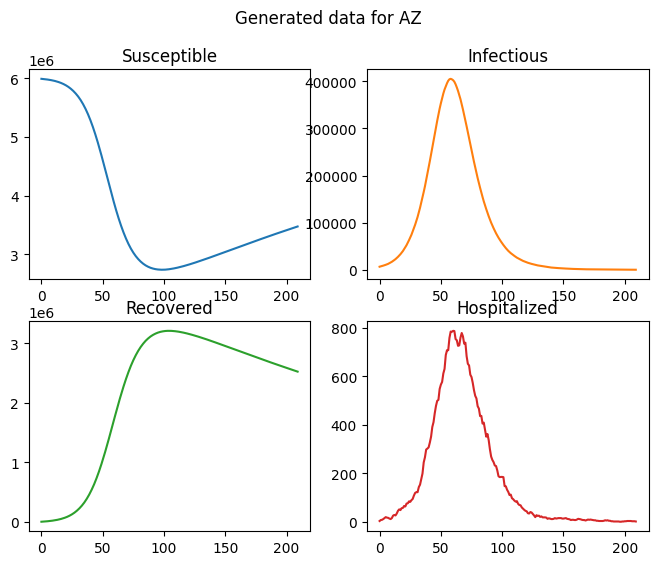

In [2]:
import matplotlib.pyplot as plt

node = 0
alpha = 1
ticks = np.arange(rume.num_ticks)
names = ["Susceptible", "Infectious", "Recovered", "Hospitalized"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(6)
axs = np.ravel(axs)
for q_idx in range(len(axs)):
    ax = axs[q_idx]
    tx = ticks
    ax.plot(tx, out.compartments[:, node, q_idx].T, color=colors[q_idx])
    ax.set_title(names[q_idx])

fig.suptitle(f"Generated data for {rume.scope.labels[node]}")
plt.show()

In [3]:
from epymorph.forecasting.multi_simulator import MultiSimulator

num_realizations = 100
pop = 6_000_000
initial_values = np.zeros(shape=(num_realizations, 1, 4), dtype=np.int64)

for i_realization in range(num_realizations):
    num_infectious = i_realization * 20
    initial_values[i_realization, ...] = np.array(
        [[pop - num_infectious, num_infectious, 0, 0]]
    )

param_values = {}
param_values["beta"] = np.zeros(shape=(num_realizations), dtype=np.float64)
for i_realization in range(num_realizations):
    param_values["beta"][i_realization, ...] = 0.5 * i_realization / num_realizations

sim = MultiSimulator()
out = sim.run(
    rume=rume,
    num_realizations=100,
    param_values=param_values,
    initial_values=None,
    rng_factory=(lambda: rng),
)

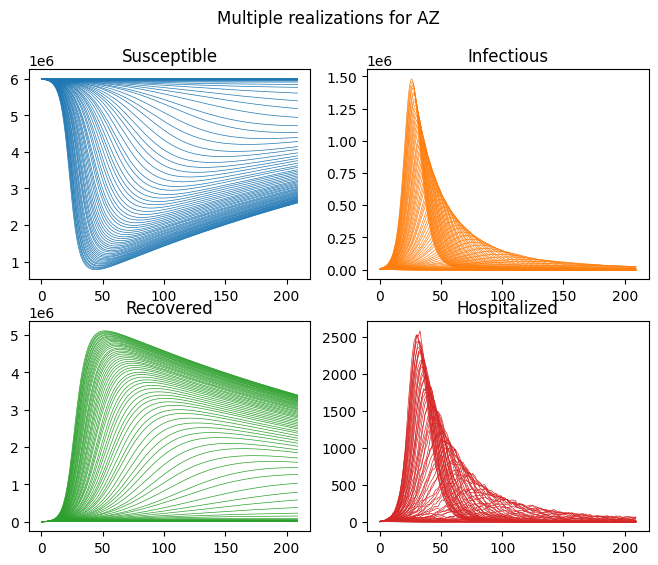

In [4]:
import matplotlib.pyplot as plt

node = 0
alpha = 1
ticks = np.arange(rume.num_ticks)
names = ["Susceptible", "Infectious", "Recovered", "Hospitalized"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(6)
axs = np.ravel(axs)
for q_idx in range(len(axs)):
    ax = axs[q_idx]
    tx = ticks
    ax.plot(
        tx,
        out.visit_compartments[:, :, node, q_idx].T,
        color=colors[q_idx],
        linewidth=0.5,
    )
    ax.set_title(names[q_idx])

fig.suptitle(f"Multiple realizations for {rume.scope.labels[node]}")
plt.show()

In [5]:
from epymorph.forecasting.multi_simulator import MultiSimulator

num_realizations = 100
pop = 6_000_000
initial_values = np.zeros(shape=(num_realizations, 1, 4), dtype=np.int64)

for i_realization in range(num_realizations):
    num_infectious = i_realization * 20
    initial_values[i_realization, ...] = np.array(
        [[pop - num_infectious, num_infectious, 0, 0]]
    )

sim = MultiSimulator()
out = sim.run(
    rume=rume,
    num_realizations=100,
    param_values=None,
    initial_values=initial_values,
    rng_factory=(lambda: rng),
)

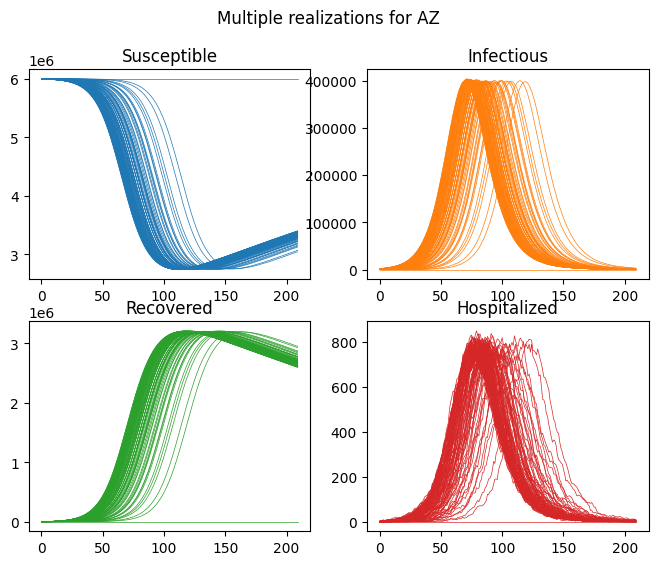

In [6]:
import matplotlib.pyplot as plt

node = 0
alpha = 1
ticks = np.arange(rume.num_ticks)
names = ["Susceptible", "Infectious", "Recovered", "Hospitalized"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(6)
axs = np.ravel(axs)
for q_idx in range(len(axs)):
    ax = axs[q_idx]
    tx = ticks
    ax.plot(
        tx,
        out.visit_compartments[:, :, node, q_idx].T,
        color=colors[q_idx],
        linewidth=0.5,
    )
    ax.set_title(names[q_idx])

fig.suptitle(f"Multiple realizations for {rume.scope.labels[node]}")
plt.show()